# Regressão Geral

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/home/matteus/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def cabecalho(msg):
    print(f"\n{'#' * 50}\n{msg}\n{'#' * 50}")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [4]:
df = pd.read_csv('./../data/processed/dataset_pbe_prototype_isolantes.csv')
df.drop(columns=['Unnamed: 0'], axis='columns', inplace=True)
df.head()

,Material,layergroup,Band gap,media_Z,media_pon_Z,max_Z,min_Z,desvio_Z,desvio_pon_Z,media_Electronegativity,media_pon_Electronegativity,max_Electronegativity,min_Electronegativity,desvio_Electronegativity,desvio_pon_Electronegativity,media_IonizationPotential,media_pon_IonizationPotential,max_IonizationPotential,min_IonizationPotential,desvio_IonizationPotential,desvio_pon_IonizationPotential,media_ElectronAffinity,media_pon_ElectronAffinity,max_ElectronAffinity,min_ElectronAffinity,desvio_ElectronAffinity,desvio_pon_ElectronAffinity,media_HOMO,media_pon_HOMO,max_HOMO,min_HOMO,desvio_HOMO,desvio_pon_HOMO,media_LUMO,media_pon_LUMO,max_LUMO,min_LUMO,desvio_LUMO,desvio_pon_LUMO,media_r_s_orbital,media_pon_r_s_orbital,max_r_s_orbital,min_r_s_orbital,desvio_r_s_orbital,desvio_pon_r_s_orbital,media_r_p_orbital,media_pon_r_p_orbital,max_r_p_orbital,min_r_p_orbital,desvio_r_p_orbital,desvio_pon_r_p_orbital,media_r_d_orbital,media_pon_r_d_orbital,max_r_d_orbital,min_r_d_orbital,desvio_r_d_orbital,desvio_pon_r_d_orbital,media_r_atomic_nonbonded,media_pon_r_atomic_nonbonded,max_r_atomic_nonbonded,min_r_atomic_nonbonded,desvio_r_atomic_nonbonded,desvio_pon_r_atomic_nonbonded,media_r_valence_lastorbital,media_pon_r_valence_lastorbital,max_r_valence_lastorbital,min_r_valence_lastorbital,desvio_r_valence_lastorbital,desvio_pon_r_valence_lastorbital,media_r_covalent,media_pon_r_covalent,max_r_covalent,min_r_covalent,desvio_r_covalent,desvio_pon_r_covalent,media_Valence,media_pon_Valence,max_Valence,min_Valence,desvio_Valence,desvio_pon_Valence,media_PeriodicColumn,media_pon_PeriodicColumn,max_PeriodicColumn,min_PeriodicColumn,desvio_PeriodicColumn,desvio_pon_PeriodicColumn,media_PeriodicColumn_upto18,media_pon_PeriodicColumn_upto18,max_PeriodicColumn_upto18,min_PeriodicColumn_upto18,desvio_PeriodicColumn_upto18,desvio_pon_PeriodicColumn_upto18,media_NumberUnfilledOrbitals,media_pon_NumberUnfilledOrbitals,max_NumberUnfilledOrbitals,min_NumberUnfilledOrbitals,desvio_NumberUnfilledOrbitals,desvio_pon_NumberUnfilledOrbitals,media_Polarizability,media_pon_Polarizability,max_Polarizability,min_Polarizability,desvio_Polarizability,desvio_pon_Polarizability
0,MoS2,p-6m2,1.580389,29.0,24.666667,42,16,13.0,13.703203,2.37,2.440000,2.58,2.16,0.21,0.221359,-9.29580,-10.105467,-6.8668,-11.7248,2.42900,2.560391,-2.0775,-2.251300,-1.5561,-2.5989,0.5214,0.549604,-5.66335,-6.111700,-4.3183,-7.0084,1.34505,1.417807,2.25250,3.048167,4.6395,-0.1345,2.38700,2.516119,1.14455,1.012133,1.5418,0.7473,0.39725,0.418738,1.25595,1.120400,1.6626,0.8493,0.40665,0.428647,1.06025,1.171300,1.3934,0.7271,0.33315,0.351171,1.235,1.163333,1.45,1.02,0.215,0.226630,0.78820,0.808567,0.8493,0.7271,0.06110,0.064405,1.295,1.213333,1.54,1.05,0.245,0.258253,6.0,6.000000,6.0,6.0,0.0,0.000000,6.0,6.000000,6.0,6.0,0.0,0.000000,11.0,12.666667,16.0,6.0,5.0,5.270463,4.0,3.333333,6.0,2.0,2.0,2.108185,52.685,41.58,86.0,19.37,33.315,35.117093
1,Mo2S4,p2_1/m11,0.051028,29.0,24.666667,42,16,13.0,13.703203,2.37,2.440000,2.58,2.16,0.21,0.221359,-9.29580,-10.105467,-6.8668,-11.7248,2.42900,2.560391,-2.0775,-2.251300,-1.5561,-2.5989,0.5214,0.549604,-5.66335,-6.111700,-4.3183,-7.0084,1.34505,1.417807,2.25250,3.048167,4.6395,-0.1345,2.38700,2.516119,1.14455,1.012133,1.5418,0.7473,0.39725,0.418738,1.25595,1.120400,1.6626,0.8493,0.40665,0.428647,1.06025,1.171300,1.3934,0.7271,0.33315,0.351171,1.235,1.163333,1.45,1.02,0.215,0.226630,0.78820,0.808567,0.8493,0.7271,0.06110,0.064405,1.295,1.213333,1.54,1.05,0.245,0.258253,6.0,6.000000,6.0,6.0,0.0,0.000000,6.0,6.000000,6.0,6.0,0.0,0.000000,11.0,12.666667,16.0,6.0,5.0,5.270463,4.0,3.333333,6.0,2.0,2.0,2.108185,52.685,41.58,86.0,19.37,33.315,35.117093
2,Rb4O2,p-3m1,0.337676,22.5,27.333333,37,8,14.5,15.284342,2.13,1.693333,3.44,0.82,1.31,1.380861,-10.22485,-8.197800,-4.1437,-16.3060,6.08115,6.410095,-1.6515,-1.262967,-0.4859,-2.8171,1.1656,1.228650,-5.63090,-4.497700,-2.2313,-9.0305,3.39960,3.583493,2.03815,1.314733,4.2084,-0.1321,2.17025,2.287644,1.38750,1.696400,

In [5]:
df.shape

(3904, 105)

In [6]:
df['layergroup'].unique()

array(['p-6m2', 'p2_1/m11', 'p-3m1', 'p2_1/b11', 'p-4m2', 'pm2_1b',
       'pm2a', 'pm2_1n', 'pmmn', 'p42_12', 'p-1', 'pmma', 'pb2n',
       'p4/mbm', 'pman', 'c2/m11', 'p112/a', 'p2/b11', 'cmme', 'p2/m11',
       'p31m', 'p1', 'pmaa', 'pbma', 'pb2_1m', 'cmmm', 'pmmm', 'p2_111',
       'p2_12_12', 'p211', 'p11a', 'p4/nmm', 'p4/mmm', 'p321', 'cm2e',
       'pb11', 'p3m1', 'pb2_1a', 'p112', 'p2_122', 'pm11', 'pmm2', 'cmm2',
       'cm11', 'c211', 'pm2m', 'p-42_1m', 'cm2m', 'pbam', 'p-42m', 'c222',
       'p4/nbm', 'p312', 'p11m', 'p-31m', 'p-62m', 'p6/mmm', 'p-3',
       'pmam', 'p6mm', 'p3', '?', 'pb2b', 'p4bm', 'p-4', 'p-6'],
      dtype=object)

In [7]:
df['layergroup'].value_counts()

layergroup
p-3m1       398
p3m1        252
p2_1/m11    227
p-31m       202
pm2_1n      197
pmmn        195
p-1         184
p2_1/b11    181
c2/m11      160
p4/nmm      152
p-6m2       149
p1          136
pm2_1b       92
pm11         89
p2_111       88
p-4m2        80
p11a         70
pm2m         63
p312         58
p31m         54
p2/m11       52
c211         51
p-3          49
p2_122       47
pmma         45
cm11         45
p4/mmm       34
p112/a       34
p-62m        33
cm2e         30
pman         29
pmm2         28
p3           26
p2/b11       24
p2_12_12     24
pb2_1a       24
p4/mbm       21
pm2a         20
cmme         19
pmmm         19
?            18
cm2m         18
pbma         18
p-42m        18
pb11         16
pbam         15
pb2_1m       14
p211         12
p6/mmm       11
cmm2         10
p112          9
cmmm          7
p-6           7
p42_12        7
p-4           6
c222          6
p11m          5
pmaa          5
p6mm          4
p-42_1m       4
p4/nbm        3
pmam         

In [8]:
# df.dropna(subset=['layergroup'],inplace=True)
# df['layergroup'] = pd.factorize(df['layergroup'])[0]

# labels, uniques = pd.factorize(df['layergroup'])
# df['layergroup'] = labels
# layergroup_mapping = dict(enumerate(uniques))

df.dropna(subset=['layergroup'], inplace=True)
labels, uniques = pd.factorize(df['layergroup'])  # primeiro, factorize
df['layergroup'] = labels                         # depois, sobrescreve
layergroup_mapping = {i: val for i, val in enumerate(uniques)}  # agora está certo


df['layergroup'].nunique()
df['layergroup'].max()

65

In [33]:
print(layergroup_mapping)


{0: 'p-6m2', 1: 'p2_1/m11', 2: 'p-3m1', 3: 'p2_1/b11', 4: 'p-4m2', 5: 'pm2_1b', 6: 'pm2a', 7: 'pm2_1n', 8: 'pmmn', 9: 'p42_12', 10: 'p-1', 11: 'pmma', 12: 'pb2n', 13: 'p4/mbm', 14: 'pman', 15: 'c2/m11', 16: 'p112/a', 17: 'p2/b11', 18: 'cmme', 19: 'p2/m11', 20: 'p31m', 21: 'p1', 22: 'pmaa', 23: 'pbma', 24: 'pb2_1m', 25: 'cmmm', 26: 'pmmm', 27: 'p2_111', 28: 'p2_12_12', 29: 'p211', 30: 'p11a', 31: 'p4/nmm', 32: 'p4/mmm', 33: 'p321', 34: 'cm2e', 35: 'pb11', 36: 'p3m1', 37: 'pb2_1a', 38: 'p112', 39: 'p2_122', 40: 'pm11', 41: 'pmm2', 42: 'cmm2', 43: 'cm11', 44: 'c211', 45: 'pm2m', 46: 'p-42_1m', 47: 'cm2m', 48: 'pbam', 49: 'p-42m', 50: 'c222', 51: 'p4/nbm', 52: 'p312', 53: 'p11m', 54: 'p-31m', 55: 'p-62m', 56: 'p6/mmm', 57: 'p-3', 58: 'pmam', 59: 'p6mm', 60: 'p3', 61: '?', 62: 'pb2b', 63: 'p4bm', 64: 'p-4', 65: 'p-6'}


In [9]:
df.head()

,Material,layergroup,Band gap,media_Z,media_pon_Z,max_Z,min_Z,desvio_Z,desvio_pon_Z,media_Electronegativity,media_pon_Electronegativity,max_Electronegativity,min_Electronegativity,desvio_Electronegativity,desvio_pon_Electronegativity,media_IonizationPotential,media_pon_IonizationPotential,max_IonizationPotential,min_IonizationPotential,desvio_IonizationPotential,desvio_pon_IonizationPotential,media_ElectronAffinity,media_pon_ElectronAffinity,max_ElectronAffinity,min_ElectronAffinity,desvio_ElectronAffinity,desvio_pon_ElectronAffinity,media_HOMO,media_pon_HOMO,max_HOMO,min_HOMO,desvio_HOMO,desvio_pon_HOMO,media_LUMO,media_pon_LUMO,max_LUMO,min_LUMO,desvio_LUMO,desvio_pon_LUMO,media_r_s_orbital,media_pon_r_s_orbital,max_r_s_orbital,min_r_s_orbital,desvio_r_s_orbital,desvio_pon_r_s_orbital,media_r_p_orbital,media_pon_r_p_orbital,max_r_p_orbital,min_r_p_orbital,desvio_r_p_orbital,desvio_pon_r_p_orbital,media_r_d_orbital,media_pon_r_d_orbital,max_r_d_orbital,min_r_d_orbital,desvio_r_d_orbital,desvio_pon_r_d_orbital,media_r_atomic_nonbonded,media_pon_r_atomic_nonbonded,max_r_atomic_nonbonded,min_r_atomic_nonbonded,desvio_r_atomic_nonbonded,desvio_pon_r_atomic_nonbonded,media_r_valence_lastorbital,media_pon_r_valence_lastorbital,max_r_valence_lastorbital,min_r_valence_lastorbital,desvio_r_valence_lastorbital,desvio_pon_r_valence_lastorbital,media_r_covalent,media_pon_r_covalent,max_r_covalent,min_r_covalent,desvio_r_covalent,desvio_pon_r_covalent,media_Valence,media_pon_Valence,max_Valence,min_Valence,desvio_Valence,desvio_pon_Valence,media_PeriodicColumn,media_pon_PeriodicColumn,max_PeriodicColumn,min_PeriodicColumn,desvio_PeriodicColumn,desvio_pon_PeriodicColumn,media_PeriodicColumn_upto18,media_pon_PeriodicColumn_upto18,max_PeriodicColumn_upto18,min_PeriodicColumn_upto18,desvio_PeriodicColumn_upto18,desvio_pon_PeriodicColumn_upto18,media_NumberUnfilledOrbitals,media_pon_NumberUnfilledOrbitals,max_NumberUnfilledOrbitals,min_NumberUnfilledOrbitals,desvio_NumberUnfilledOrbitals,desvio_pon_NumberUnfilledOrbitals,media_Polarizability,media_pon_Polarizability,max_Polarizability,min_Polarizability,desvio_Polarizability,desvio_pon_Polarizability
0,MoS2,0,1.580389,29.0,24.666667,42,16,13.0,13.703203,2.37,2.440000,2.58,2.16,0.21,0.221359,-9.29580,-10.105467,-6.8668,-11.7248,2.42900,2.560391,-2.0775,-2.251300,-1.5561,-2.5989,0.5214,0.549604,-5.66335,-6.111700,-4.3183,-7.0084,1.34505,1.417807,2.25250,3.048167,4.6395,-0.1345,2.38700,2.516119,1.14455,1.012133,1.5418,0.7473,0.39725,0.418738,1.25595,1.120400,1.6626,0.8493,0.40665,0.428647,1.06025,1.171300,1.3934,0.7271,0.33315,0.351171,1.235,1.163333,1.45,1.02,0.215,0.226630,0.78820,0.808567,0.8493,0.7271,0.06110,0.064405,1.295,1.213333,1.54,1.05,0.245,0.258253,6.0,6.000000,6.0,6.0,0.0,0.000000,6.0,6.000000,6.0,6.0,0.0,0.000000,11.0,12.666667,16.0,6.0,5.0,5.270463,4.0,3.333333,6.0,2.0,2.0,2.108185,52.685,41.58,86.0,19.37,33.315,35.117093
1,Mo2S4,1,0.051028,29.0,24.666667,42,16,13.0,13.703203,2.37,2.440000,2.58,2.16,0.21,0.221359,-9.29580,-10.105467,-6.8668,-11.7248,2.42900,2.560391,-2.0775,-2.251300,-1.5561,-2.5989,0.5214,0.549604,-5.66335,-6.111700,-4.3183,-7.0084,1.34505,1.417807,2.25250,3.048167,4.6395,-0.1345,2.38700,2.516119,1.14455,1.012133,1.5418,0.7473,0.39725,0.418738,1.25595,1.120400,1.6626,0.8493,0.40665,0.428647,1.06025,1.171300,1.3934,0.7271,0.33315,0.351171,1.235,1.163333,1.45,1.02,0.215,0.226630,0.78820,0.808567,0.8493,0.7271,0.06110,0.064405,1.295,1.213333,1.54,1.05,0.245,0.258253,6.0,6.000000,6.0,6.0,0.0,0.000000,6.0,6.000000,6.0,6.0,0.0,0.000000,11.0,12.666667,16.0,6.0,5.0,5.270463,4.0,3.333333,6.0,2.0,2.0,2.108185,52.685,41.58,86.0,19.37,33.315,35.117093
2,Rb4O2,2,0.337676,22.5,27.333333,37,8,14.5,15.284342,2.13,1.693333,3.44,0.82,1.31,1.380861,-10.22485,-8.197800,-4.1437,-16.3060,6.08115,6.410095,-1.6515,-1.262967,-0.4859,-2.8171,1.1656,1.228650,-5.63090,-4.497700,-2.2313,-9.0305,3.39960,3.583493,2.03815,1.314733,4.2084,-0.1321,2.17025,2.287644,1.38750,1.696400,2.3142,0.4608,0

In [10]:
df['layergroup'].value_counts()

layergroup
2     398
36    252
1     227
54    202
7     197
8     195
10    184
3     181
15    160
31    152
0     149
21    136
5      92
40     89
27     88
4      80
30     70
45     63
52     58
20     54
19     52
44     51
57     49
39     47
11     45
43     45
32     34
16     34
55     33
34     30
14     29
41     28
60     26
17     24
28     24
37     24
13     21
6      20
18     19
26     19
61     18
47     18
23     18
49     18
35     16
48     15
24     14
29     12
56     11
42     10
38      9
25      7
65      7
9       7
64      6
50      6
53      5
22      5
59      4
46      4
51      3
58      3
62      2
33      2
12      2
63      1
Name: count, dtype: int64

In [11]:
## Contabilizando metais e isolantes antes de transformar o gap em números inteiros ##
n_metal = n_insulator = 0

for i in df['Band gap']:
    if i > 0.0000000001:
        n_insulator += 1
    else:
        n_metal += 1

cabecalho('Número de metais e isolantes')
print(f' No de metais: {n_metal} \n No de isolantes: {n_insulator}')


##################################################
Número de metais e isolantes
##################################################
 No de metais: 0 
 No de isolantes: 3904


In [12]:
df['Band gap'].min()

1.452457805806162e-05

In [13]:
df['Band gap'].max()

8.565901281618878

In [14]:
pri = seg = ter = qua = qui = sex = seti = oit = non = 0

for i in df['Band gap']:
    if i > 0.0001 and i <= 1.0:
        pri = pri + 1
    elif i > 1.0 and i <= 2.0:
        seg = seg + 1
    elif i > 2.0 and i <= 3.0:
        ter = ter + 1
    elif i > 3.0 and i <= 4.0:
        qua = qua + 1
    elif i > 4.0 and i <= 5.0:
        qui = qui + 1
    elif i > 5.0 and i <= 6.0:
        sex = sex + 1
    elif i > 6.0 and i <= 7.0:
        seti = seti + 1
    elif i > 7.0 and i <= 8.0:
        oit = oit + 1
    elif i > 8.0 and i <= 9.0:
        non = non + 1

print(f''' Contagem de isolantes com gap entre 0 e 1: {pri}\n
Contagem de isolantes com gap entre 1 e 2: {seg}\n
Contagem de isolantes com gap entre 2 e 3: {ter}\n
Contagem de isolantes com gap entre 3 e 4: {qua}\n
Contagem de isolantes com gap entre 4 e 5: {qui}\n
Contagem de isolantes com gap entre 5 e 6: {sex}\n
Contagem de isolantes com gap entre 6 e 7: {seti}\n
Contagem de isolantes com gap entre 7 e 8: {oit}\n
Contagem de isolantes com gap entre 8 e 9: {non}''')

 Contagem de isolantes com gap entre 0 e 1: 1489

Contagem de isolantes com gap entre 1 e 2: 1130

Contagem de isolantes com gap entre 2 e 3: 644

Contagem de isolantes com gap entre 3 e 4: 324

Contagem de isolantes com gap entre 4 e 5: 214

Contagem de isolantes com gap entre 5 e 6: 75

Contagem de isolantes com gap entre 6 e 7: 19

Contagem de isolantes com gap entre 7 e 8: 4

Contagem de isolantes com gap entre 8 e 9: 4


In [15]:
print('Soma dos materiais com todos os gaps: ', np.sum([pri, seg, ter, qua, qui, sex, seti, oit, non]))

Soma dos materiais com todos os gaps:  3903


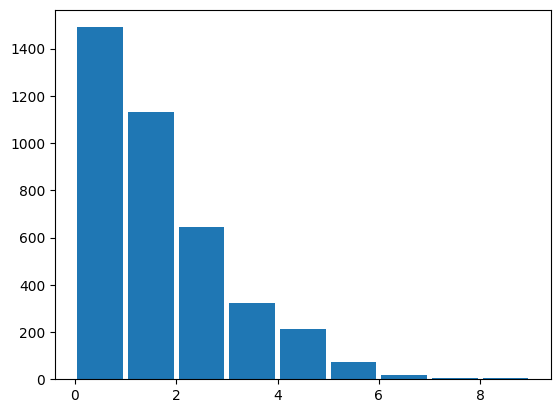

In [16]:
gap = df['Band gap'].copy()
plt.hist(gap, bins=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0],
         density=False, label='Data', rwidth=0.9)
plt.savefig('./../figures/hist_gap_pbe.png', dpi=300, bbox_inches='tight')

In [17]:
# print(df.isnull().sum())

In [18]:
seed = 50
np.random.seed(seed)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=seed, shuffle=True)

print('treino:', train_set.shape)
print('teste:', test_set.shape)


treino: (3123, 105)
teste: (781, 105)


In [19]:
X = train_set.drop(['Band gap', 'Material'], axis='columns')
y = train_set['Band gap']

X = X.dropna()
y = y.loc[X.index]

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

In [21]:
from sklearn.ensemble import RandomForestRegressor
y_pred = cross_val_predict(RandomForestRegressor(), X, y, cv=5)
print('RMSE:', mean_squared_error(y, y_pred))
print('MAE:', mean_absolute_error(y, y_pred))
print('R2:', r2_score(y, y_pred))

RMSE: 0.3663349024007976
MAE: 0.43496678816967205
R2: 0.7891549116429536


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
clf_gradboost = GradientBoostingRegressor(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    max_leaf_nodes=None
)

y_pred = cross_val_predict(clf_gradboost, X, y, cv=5)
print('RMSE:', mean_squared_error(y, y_pred))
print('MAE:', mean_absolute_error(y, y_pred))
print('R2:', r2_score(y, y_pred))


RMSE: 0.39675270052265454
MAE: 0.4740644383238529
R2: 0.7716478619717406


In [23]:
cabecalho('AdaBoost')
from sklearn.ensemble import AdaBoostRegressor
y_pred = cross_val_predict(AdaBoostRegressor(), X, y, cv=5)
print('RMSE:', mean_squared_error(y, y_pred))
print('MAE:', mean_absolute_error(y, y_pred))
print('R2:', r2_score(y, y_pred))


##################################################
AdaBoost
##################################################
RMSE: 0.6983817032549788
MAE: 0.6822914739605173
R2: 0.5980444370309064


In [24]:

cabecalho('Decision Tree')
from sklearn.tree import DecisionTreeRegressor
y_pred = cross_val_predict(DecisionTreeRegressor(), X, y, cv=5)
print('RMSE:', mean_squared_error(y, y_pred))
print('MAE:', mean_absolute_error(y, y_pred))
print('R2:', r2_score(y, y_pred))



##################################################
Decision Tree
##################################################
RMSE: 0.7070024924875276
MAE: 0.5595726303826621
R2: 0.593082717425343


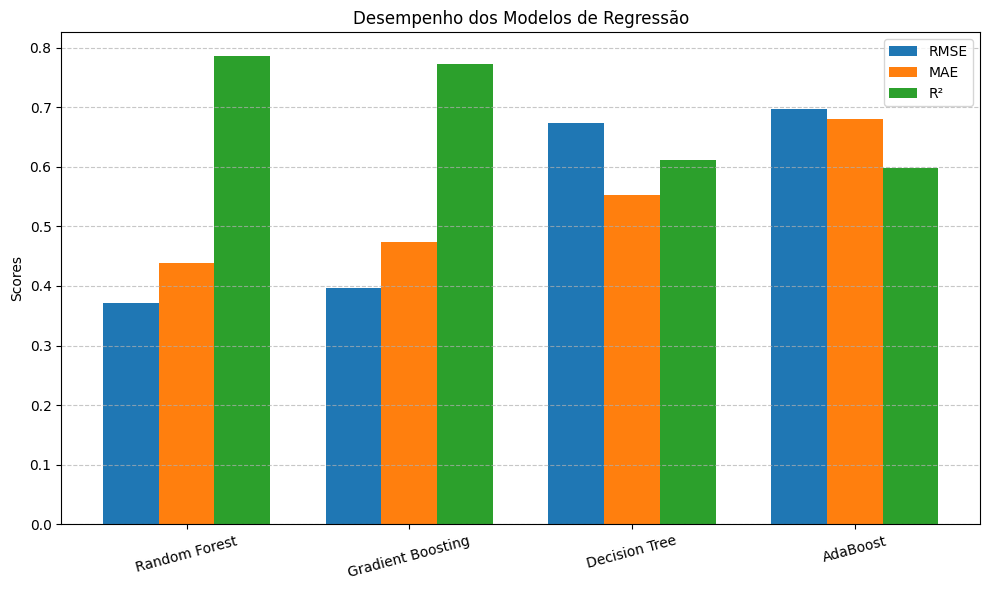

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
model_names = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'AdaBoost']
rmse = [0.3711, 0.3961, 0.6736, 0.6972]
mae =  [0.4387, 0.4738, 0.5530, 0.6794]
r2   =  [0.7864, 0.7720, 0.6122, 0.5987]

x = np.arange(len(model_names))  # posição dos grupos
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, rmse, width, label='RMSE')
ax.bar(x, mae, width, label='MAE')
ax.bar(x + width, r2, width, label='R²')

# Configurações
ax.set_ylabel('Scores')
ax.set_title('Desempenho dos Modelos de Regressão')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=15)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [26]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    # "loss": ["squared_error"],
    "learning_rate": [0.02, 0.05, 0.1, 0.2, 0.3],
    "min_samples_split": [2, 4, 8, 12, 16, 20],
    "min_samples_leaf": [1, 2, 4, 8, 12, 16, 20],
    "max_depth": [3, 5, 7, 8, 10],
    "max_features": [None, 'sqrt'],
    "criterion": ["friedman_mse"],
    "subsample": [1.0],
    "max_leaf_nodes": [8, 12, 16, 20, 24, 28, 32],
    "n_estimators": [50, 60, 70, 80, 90, 100, 120, 140, 160, 165, 170, 175,
                     180, 185, 190, 195, 200, 220, 240, 260, 270, 280, 300]
}

random_search = RandomizedSearchCV(
    GradientBoostingRegressor(),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    refit=True,
    n_iter=20,
    n_jobs=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    random_state=seed,
    return_train_score=True
)

random_search.fit(X, y)

print('Melhores parâmetros', random_search.best_params_)

cabecalho('Modelo final')
modelo = random_search.best_estimator_
print(modelo)


Melhores parâmetros {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 12, 'max_leaf_nodes': 20, 'max_features': None, 'max_depth': 7, 'learning_rate': 0.05, 'criterion': 'friedman_mse'}

##################################################
Modelo final
##################################################
GradientBoostingRegressor(learning_rate=0.05, max_depth=7, max_leaf_nodes=20,
                          min_samples_leaf=12, n_estimators=300)


In [27]:
cabecalho('Resultado de cada validação cruzada')
random_results = pd.DataFrame(random_search.cv_results_)[['params',
    'rank_test_score', 'mean_test_score']]
print(random_results)



##################################################
Resultado de cada validação cruzada
##################################################
                                                                                                                                                                                                        params  \
0    {'subsample': 1.0, 'n_estimators': 185, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_leaf_nodes': 16, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.05, 'criterion': 'friedman_mse'}   
1     {'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 12, 'min_samples_leaf': 20, 'max_leaf_nodes': 16, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.2, 'criterion': 'friedman_mse'}   
2        {'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_leaf_nodes': 28, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}   
3    {'subsample': 1.

In [170]:
cabecalho('Performance do modelo no conjunto de teste')
testX = test_set.drop(['Band gap', 'Material'], axis='columns')
testY = test_set['Band gap']

testX = testX.dropna()
testY = testY.loc[testX.index]  # garantir alinhamento
result = modelo.predict(testX)

result = modelo.predict(testX)
print('RMSE:', mean_squared_error(testY, result))
print('MAE:', mean_absolute_error(testY, result))
print('R2:', r2_score(testY, result))


##################################################
Performance do modelo no conjunto de teste
##################################################
RMSE: 0.33276571585068104
MAE: 0.40509809628649046
R2: 0.8010174357660965


In [171]:
## new_data ##
df = pd.read_csv('./../data/processed/dataset_pred_insulators.csv')
df.drop('Unnamed: 0', axis='columns', inplace=True)

df = df.dropna() 

## informando quem são as features ##
X_new = df.drop(['Material'], axis='columns')
y_new = modelo.predict(X_new)
# print(y_new)

name_columns = list(df.columns)
name_columns.append('band gap')

df_insulators = pd.DataFrame(columns=name_columns)
for i in range(0, 266):
    nova_entrada = list(df.loc[i])
    nova_entrada.append(y_new[i])
    df_insulators.loc[len(df_insulators)] = nova_entrada
# print(df_insulators.head())

df_insulators.to_csv('./../data/processed/prediction_gap_pbe.csv')

df_ultra = pd.DataFrame(columns=name_columns)
## separando os ultrawide band gap ##
for i in range(0, 266):
    if y_new[i] > 2.0:
        nova_entrada = list(df.loc[i])
        nova_entrada.append(y_new[i])
        df_ultra.loc[len(df_ultra)] = nova_entrada

df_ultra.to_csv('./../data/processed/insulators_ultra_pbe.csv')


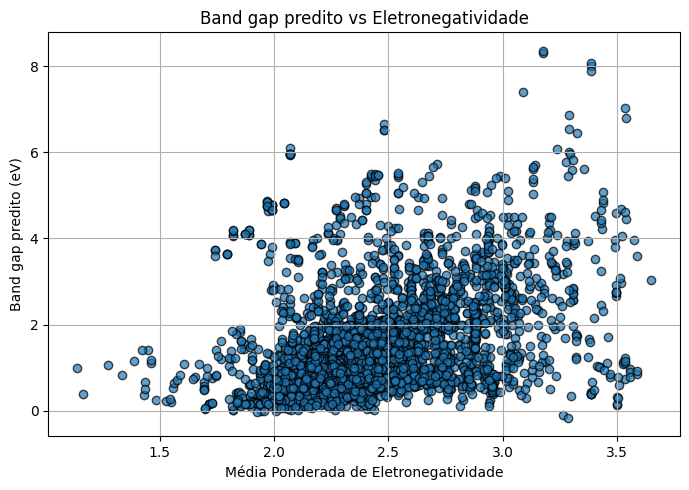

In [172]:
plt.figure(figsize=(7,5))
plt.scatter(X_new['media_pon_Electronegativity'], y_new, alpha=0.7, edgecolor='k')
plt.xlabel("Média Ponderada de Eletronegatividade")
plt.ylabel("Band gap predito (eV)")
plt.title("Band gap predito vs Eletronegatividade")
plt.grid(True)
plt.tight_layout()
plt.show()


In [173]:
df_ultra['layergroup'] = df_ultra['layergroup'].map(layergroup_mapping)
# df_ultra.to_csv('./../data/processed/insulators_ultra_pbe.csv')

In [174]:
df_ultra.sample(10, random_state=50)

,Material,layergroup,media_Z,media_pon_Z,max_Z,min_Z,desvio_Z,desvio_pon_Z,media_Electronegativity,media_pon_Electronegativity,max_Electronegativity,min_Electronegativity,desvio_Electronegativity,desvio_pon_Electronegativity,media_IonizationPotential,media_pon_IonizationPotential,max_IonizationPotential,min_IonizationPotential,desvio_IonizationPotential,desvio_pon_IonizationPotential,media_ElectronAffinity,media_pon_ElectronAffinity,max_ElectronAffinity,min_ElectronAffinity,desvio_ElectronAffinity,desvio_pon_ElectronAffinity,media_HOMO,media_pon_HOMO,max_HOMO,min_HOMO,desvio_HOMO,desvio_pon_HOMO,media_LUMO,media_pon_LUMO,max_LUMO,min_LUMO,desvio_LUMO,desvio_pon_LUMO,media_r_s_orbital,media_pon_r_s_orbital,max_r_s_orbital,min_r_s_orbital,desvio_r_s_orbital,desvio_pon_r_s_orbital,media_r_p_orbital,media_pon_r_p_orbital,max_r_p_orbital,min_r_p_orbital,desvio_r_p_orbital,desvio_pon_r_p_orbital,media_r_d_orbital,media_pon_r_d_orbital,max_r_d_orbital,min_r_d_orbital,desvio_r_d_orbital,desvio_pon_r_d_orbital,media_r_atomic_nonbonded,media_pon_r_atomic_nonbonded,max_r_atomic_nonbonded,min_r_atomic_nonbonded,desvio_r_atomic_nonbonded,desvio_pon_r_atomic_nonbonded,media_r_valence_lastorbital,media_pon_r_valence_lastorbital,max_r_valence_lastorbital,min_r_valence_lastorbital,desvio_r_valence_lastorbital,desvio_pon_r_valence_lastorbital,media_r_covalent,media_pon_r_covalent,max_r_covalent,min_r_covalent,desvio_r_covalent,desvio_pon_r_covalent,media_Valence,media_pon_Valence,max_Valence,min_Valence,desvio_Valence,desvio_pon_Valence,media_PeriodicColumn,media_pon_PeriodicColumn,max_PeriodicColumn,min_PeriodicColumn,desvio_PeriodicColumn,desvio_pon_PeriodicColumn,media_PeriodicColumn_upto18,media_pon_PeriodicColumn_upto18,max_PeriodicColumn_upto18,min_PeriodicColumn_upto18,desvio_PeriodicColumn_upto18,desvio_pon_PeriodicColumn_upto18,media_NumberUnfilledOrbitals,media_pon_NumberUnfilledOrbitals,max_NumberUnfilledOrbitals,min_NumberUnfilledOrbitals,desvio_NumberUnfilledOrbitals,desvio_pon_NumberUnfilledOrbitals,media_Polarizability,media_pon_Polarizability,max_Polarizability,min_Polarizability,desvio_Polarizability,desvio_pon_Polarizability,band gap
57,ZnF2,p-6m2,19.5,16.000000,30,9,10.5,11.067972,2.815,3.203333,3.98,1.65,1.165,1.228018,-14.57370,-16.133500,-9.8943,-19.2531,4.67940,4.932521,-1.04400,-2.057600,1.9968,-4.0848,3.04080,3.205285,-8.54560,-9.401733,-5.9772,-11.1140,2.56840,2.707331,0.46595,0.883200,1.7177,-0.7858,1.25175,1.319460,0.75560,0.638533,1.1068,0.4044,0.35120,0.370197,1.00875,0.797167,1.6435,0.3740,0.63475,0.669085,0.68260,0.810233,1.0655,0.2997,0.38290,0.403612,1.010,0.910000,1.31,0.71,0.300,0.316228,0.74040,0.618267,1.1068,0.3740,0.36640,0.386220,0.895,0.786667,1.22,0.57,0.325,0.342580,9.5,8.666667,12.0,7.0,2.5,2.635231,4.5,5.333333,7.0,2.0,2.5,2.635231,14.5,15.333333,17.0,12.0,2.5,2.635231,0.5,0.666667,1.0,0.0,0.5,0.527046,21.183,15.355333,38.666,3.70,17.483,18.428700,3.581955
17,SrBr2,p2_1/m11,36.5,36.000000,38,35,1.5,1.581139,1.955,2.290000,2.96,0.95,1.005,1.059363,-9.18255,-10.289833,-5.8607,-12.5044,3.32185,3.501537,-1.29865,-2.037433,0.9177,-3.5150,2.21635,2.336238,-5.69190,-6.414100,-3.5253,-7.8585,2.16660,2.283797,2.15455,3.242800,5.4193,-1.1102,3.26475,3.441349,1.35485,1.153700,1.9583,0.7514,0.60345,0.636092,1.57525,1.344633,2.2671,0.8834,0.69185,0.729274,0.64185,0.503933,1.0556,0.2281,0.41375,0.436131,1.530,1.400000,1.92,1.14,0.390,0.411096,1.42085,1.241700,1.9583,0.8834,0.53745,0.566522,1.575,1.450000,1.95,1.20,0.375,0.395285,9.5,12.000000,17.0,2.0,7.5,7.905694,4.5,5.333333,7.0,2.0,2.5,2.635231,9.5,12.000000,17.0,2.0,7.5,7.905694,0.5,0.666667,1.0,0.0,0.5,0.527046,109.500,80.266667,197.200,21.80,87.700,92.443917,4.468164
52,CdF2,p-6m2,28.5,22.000000,48,9,19.5,20.554805,2.835,3.216667,3.98,1.69,1.145,1.206936,-14.25680,-15.922233,-9.2605,-19.2531,4.99630,5.266563,-1.23685,-2.186167,1.6111,-4.0848,2.84795,3.002003,-8.38550,-9.295000,-5.6570,-11.1140,2.72850,2.876092,0.38725,0.830733,1.7177,-0.9432,1.33045,1.40241

In [175]:
df_ultra.to_csv('./../data/processed/insulators_ultra_pbe.csv')

In [176]:
df_ultra['band gap'].min()

2.0104036451347165

In [177]:
df_ultra['band gap'].max()

8.356542371479893

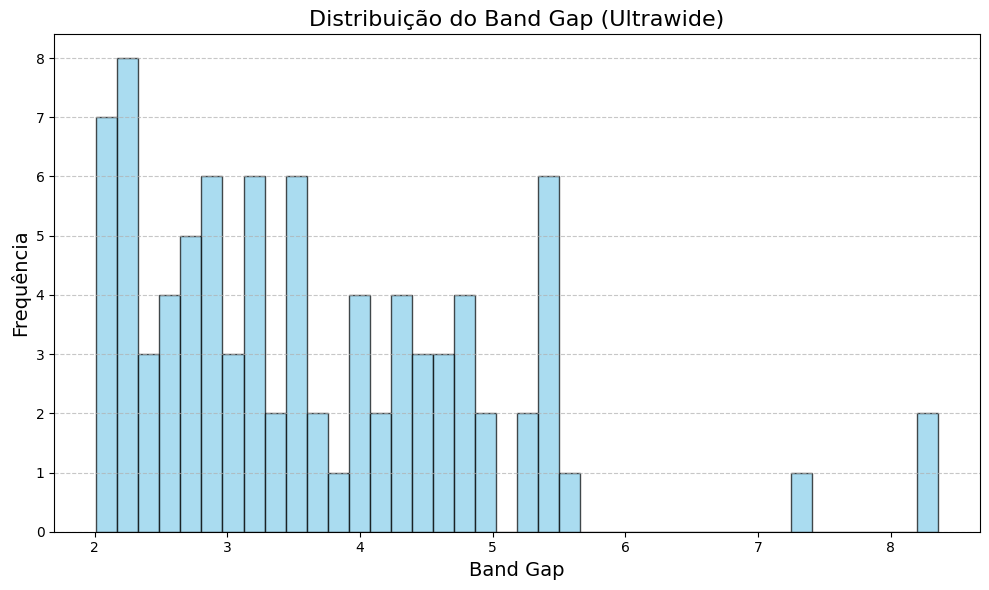

In [178]:
# import matplotlib.pyplot as plt

# Melhorando o histograma do 'band gap'
plt.figure(figsize=(10, 6))
plt.hist(df_ultra['band gap'], bins=40, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição do Band Gap (Ultrawide)', fontsize=16)
plt.xlabel('Band Gap', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Salvando o histograma
plt.savefig('./../figures/hist_ultra_band_gap.png', dpi=300, bbox_inches='tight')

# Exibindo o histograma
plt.show()

In [179]:
df_ultra[['Material', 'band gap', 'layergroup']]

,Material,band gap,layergroup
0,Ti2O4,2.851985,p2_1/b11
1,Cd2I4,2.017815,pm2_1n
2,Cd2I4,2.067574,pmmn
3,Sr2Br4,4.453857,p-1
4,Sr2Cl4,5.422391,p-1
5,In4Cl8,2.311410,p-4m2
6,In4Cl8,2.311410,pm2a
7,HgCl2,2.287393,p2_1/m11
8,HgCl2,2.301762,p-3m1
9,HgCl2,2.025690,p-6m2


In [180]:
print(layergroup_mapping)

{0: 'p-6m2', 1: 'p2_1/m11', 2: 'p-3m1', 3: 'p2_1/b11', 4: 'p-4m2', 5: 'pm2_1b', 6: 'pm2a', 7: 'pm2_1n', 8: 'pmmn', 9: 'p42_12', 10: 'p-1', 11: 'pmma', 12: 'pb2n', 13: 'p4/mbm', 14: 'pman', 15: 'c2/m11', 16: 'p112/a', 17: 'p2/b11', 18: 'cmme', 19: 'p2/m11', 20: 'p31m', 21: 'p1', 22: 'pmaa', 23: 'pbma', 24: 'pb2_1m', 25: 'cmmm', 26: 'pmmm', 27: 'p2_111', 28: 'p2_12_12', 29: 'p211', 30: 'p11a', 31: 'p4/nmm', 32: 'p4/mmm', 33: 'p321', 34: 'cm2e', 35: 'pb11', 36: 'p3m1', 37: 'pb2_1a', 38: 'p112', 39: 'p2_122', 40: 'pm11', 41: 'pmm2', 42: 'cmm2', 43: 'cm11', 44: 'c211', 45: 'pm2m', 46: 'p-42_1m', 47: 'cm2m', 48: 'pbam', 49: 'p-42m', 50: 'c222', 51: 'p4/nbm', 52: 'p312', 53: 'p11m', 54: 'p-31m', 55: 'p-62m', 56: 'p6/mmm', 57: 'p-3', 58: 'pmam', 59: 'p6mm', 60: 'p3', 61: '?', 62: 'pb2b', 63: 'p4bm', 64: 'p-4', 65: 'p-6'}


In [181]:
import matplotlib.pyplot as plt
import os

# Criar pasta de saída
output_dir = './../figures/layergroup_bar_charts'
os.makedirs(output_dir, exist_ok=True)

# Gerar gráficos
for layergroup, group_data in df_ultra.groupby('layergroup'):
    # Substitui "/" por "_" para evitar erro de path
    safe_name = str(layergroup).replace('/', '_')

    # Ordena pelo band gap
    group_data = group_data.sort_values(by='band gap', ascending=False)
    
    # Cria gráfico
    plt.figure(figsize=(12, 6))
    plt.bar(group_data['Material'], group_data['band gap'], color='skyblue', edgecolor='black')
    plt.title(f'Diagrama de Barras - Layergroup: {layergroup}', fontsize=16)
    plt.xlabel('Material', fontsize=14)
    plt.ylabel('Band Gap', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    
    # Salva o gráfico com nome seguro
    file_path = os.path.join(output_dir, f'layergroup_{safe_name}.png')
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    plt.close()

print(f"Diagramas de barras salvos em: {output_dir}")


Diagramas de barras salvos em: ./../figures/layergroup_bar_charts


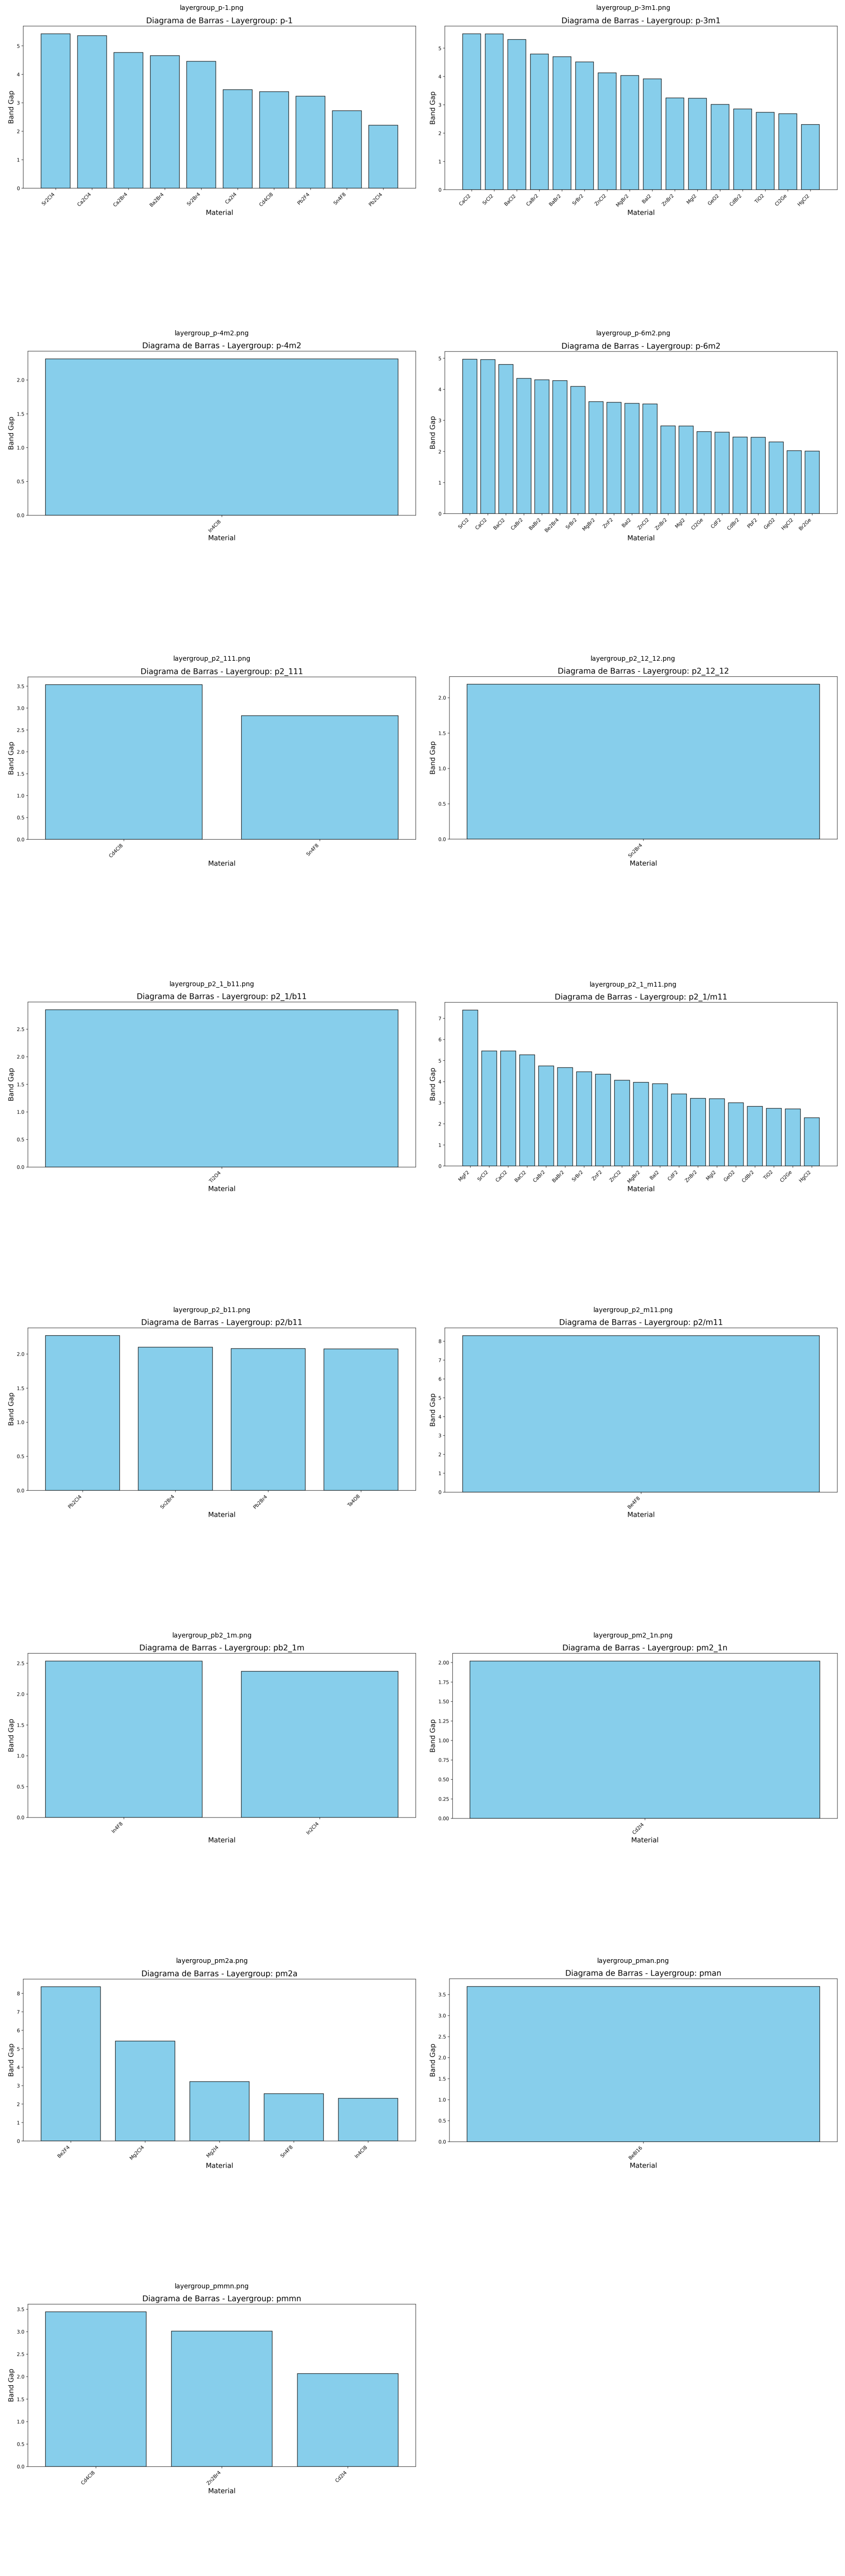

In [205]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import math

# Caminho das imagens
output_dir = './../figures/layergroup_bar_charts'
image_files = sorted([f for f in os.listdir(output_dir) if f.endswith('.png')])

# Parâmetros de layout
n_cols = 2
n_rows = math.ceil(len(image_files) / n_cols)

# Figura proporcional ao número de imagens
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 7 * n_rows))

# Garantir que axes seja 2D
axes = axes.reshape((n_rows, n_cols)) if n_rows > 1 else [axes]

# Inserir imagens
for idx, filename in enumerate(image_files):
    row, col = divmod(idx, n_cols)
    ax = axes[row][col]
    img = mpimg.imread(os.path.join(output_dir, filename))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(filename, fontsize=10)

# Desativar eixos extras se número de imagens for ímpar
if len(image_files) % 2 != 0:
    axes[-1][-1].axis('off')

plt.tight_layout()
plt.show()


In [183]:
df_ultra.sample(10,  random_state=50)

,Material,layergroup,media_Z,media_pon_Z,max_Z,min_Z,desvio_Z,desvio_pon_Z,media_Electronegativity,media_pon_Electronegativity,max_Electronegativity,min_Electronegativity,desvio_Electronegativity,desvio_pon_Electronegativity,media_IonizationPotential,media_pon_IonizationPotential,max_IonizationPotential,min_IonizationPotential,desvio_IonizationPotential,desvio_pon_IonizationPotential,media_ElectronAffinity,media_pon_ElectronAffinity,max_ElectronAffinity,min_ElectronAffinity,desvio_ElectronAffinity,desvio_pon_ElectronAffinity,media_HOMO,media_pon_HOMO,max_HOMO,min_HOMO,desvio_HOMO,desvio_pon_HOMO,media_LUMO,media_pon_LUMO,max_LUMO,min_LUMO,desvio_LUMO,desvio_pon_LUMO,media_r_s_orbital,media_pon_r_s_orbital,max_r_s_orbital,min_r_s_orbital,desvio_r_s_orbital,desvio_pon_r_s_orbital,media_r_p_orbital,media_pon_r_p_orbital,max_r_p_orbital,min_r_p_orbital,desvio_r_p_orbital,desvio_pon_r_p_orbital,media_r_d_orbital,media_pon_r_d_orbital,max_r_d_orbital,min_r_d_orbital,desvio_r_d_orbital,desvio_pon_r_d_orbital,media_r_atomic_nonbonded,media_pon_r_atomic_nonbonded,max_r_atomic_nonbonded,min_r_atomic_nonbonded,desvio_r_atomic_nonbonded,desvio_pon_r_atomic_nonbonded,media_r_valence_lastorbital,media_pon_r_valence_lastorbital,max_r_valence_lastorbital,min_r_valence_lastorbital,desvio_r_valence_lastorbital,desvio_pon_r_valence_lastorbital,media_r_covalent,media_pon_r_covalent,max_r_covalent,min_r_covalent,desvio_r_covalent,desvio_pon_r_covalent,media_Valence,media_pon_Valence,max_Valence,min_Valence,desvio_Valence,desvio_pon_Valence,media_PeriodicColumn,media_pon_PeriodicColumn,max_PeriodicColumn,min_PeriodicColumn,desvio_PeriodicColumn,desvio_pon_PeriodicColumn,media_PeriodicColumn_upto18,media_pon_PeriodicColumn_upto18,max_PeriodicColumn_upto18,min_PeriodicColumn_upto18,desvio_PeriodicColumn_upto18,desvio_pon_PeriodicColumn_upto18,media_NumberUnfilledOrbitals,media_pon_NumberUnfilledOrbitals,max_NumberUnfilledOrbitals,min_NumberUnfilledOrbitals,desvio_NumberUnfilledOrbitals,desvio_pon_NumberUnfilledOrbitals,media_Polarizability,media_pon_Polarizability,max_Polarizability,min_Polarizability,desvio_Polarizability,desvio_pon_Polarizability,band gap
57,ZnF2,p-6m2,19.5,16.000000,30,9,10.5,11.067972,2.815,3.203333,3.98,1.65,1.165,1.228018,-14.57370,-16.133500,-9.8943,-19.2531,4.67940,4.932521,-1.04400,-2.057600,1.9968,-4.0848,3.04080,3.205285,-8.54560,-9.401733,-5.9772,-11.1140,2.56840,2.707331,0.46595,0.883200,1.7177,-0.7858,1.25175,1.319460,0.75560,0.638533,1.1068,0.4044,0.35120,0.370197,1.00875,0.797167,1.6435,0.3740,0.63475,0.669085,0.68260,0.810233,1.0655,0.2997,0.38290,0.403612,1.010,0.910000,1.31,0.71,0.300,0.316228,0.74040,0.618267,1.1068,0.3740,0.36640,0.386220,0.895,0.786667,1.22,0.57,0.325,0.342580,9.5,8.666667,12.0,7.0,2.5,2.635231,4.5,5.333333,7.0,2.0,2.5,2.635231,14.5,15.333333,17.0,12.0,2.5,2.635231,0.5,0.666667,1.0,0.0,0.5,0.527046,21.183,15.355333,38.666,3.70,17.483,18.428700,3.581955
17,SrBr2,p2_1/m11,36.5,36.000000,38,35,1.5,1.581139,1.955,2.290000,2.96,0.95,1.005,1.059363,-9.18255,-10.289833,-5.8607,-12.5044,3.32185,3.501537,-1.29865,-2.037433,0.9177,-3.5150,2.21635,2.336238,-5.69190,-6.414100,-3.5253,-7.8585,2.16660,2.283797,2.15455,3.242800,5.4193,-1.1102,3.26475,3.441349,1.35485,1.153700,1.9583,0.7514,0.60345,0.636092,1.57525,1.344633,2.2671,0.8834,0.69185,0.729274,0.64185,0.503933,1.0556,0.2281,0.41375,0.436131,1.530,1.400000,1.92,1.14,0.390,0.411096,1.42085,1.241700,1.9583,0.8834,0.53745,0.566522,1.575,1.450000,1.95,1.20,0.375,0.395285,9.5,12.000000,17.0,2.0,7.5,7.905694,4.5,5.333333,7.0,2.0,2.5,2.635231,9.5,12.000000,17.0,2.0,7.5,7.905694,0.5,0.666667,1.0,0.0,0.5,0.527046,109.500,80.266667,197.200,21.80,87.700,92.443917,4.468164
52,CdF2,p-6m2,28.5,22.000000,48,9,19.5,20.554805,2.835,3.216667,3.98,1.69,1.145,1.206936,-14.25680,-15.922233,-9.2605,-19.2531,4.99630,5.266563,-1.23685,-2.186167,1.6111,-4.0848,2.84795,3.002003,-8.38550,-9.295000,-5.6570,-11.1140,2.72850,2.876092,0.38725,0.830733,1.7177,-0.9432,1.33045,1.40241

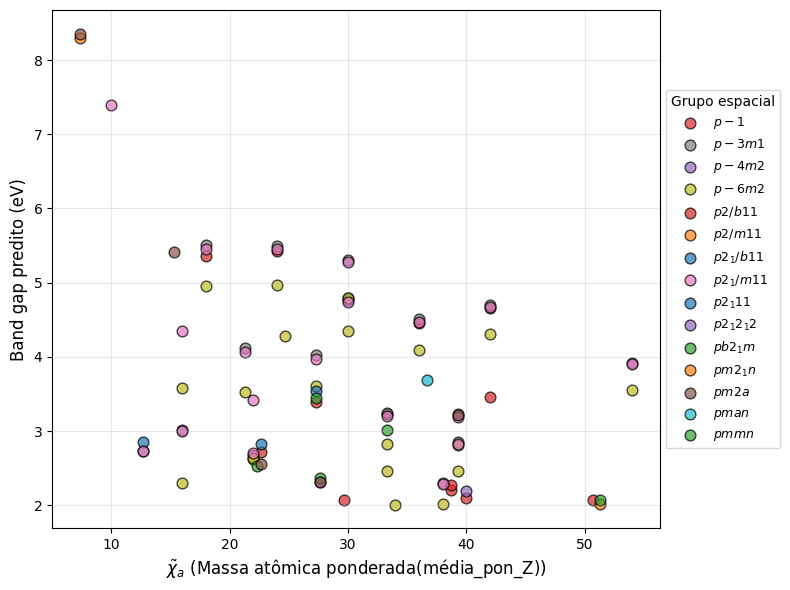

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_layergroups = df_ultra['layergroup'].unique()
palette = sns.color_palette("tab10", len(unique_layergroups))
color_map = {lg: palette[i % len(palette)] for i, lg in enumerate(unique_layergroups)}

plt.figure(figsize=(8, 6))

# Lista para guardar os handles da legenda
handles = []
labels = []

for layergroup, group_data in df_ultra.groupby('layergroup'):
    if group_data.empty:
        continue
    scatter = plt.scatter(
        group_data['media_pon_Z'],
        group_data['band gap'],
        label=layergroup,
        color=color_map[layergroup],
        alpha=0.7,
        edgecolor='k',
        s=60
    )
    handles.append(scatter)
    labels.append(f"$\\it{{{layergroup}}}$")

# Eixos e estilos
plt.xlabel(r'$\tilde{\chi}_a$ (Massa atômica ponderada(média_pon_Z))', fontsize=12)
plt.ylabel('Band gap predito (eV)', fontsize=12)
plt.grid(True, alpha=0.3)

# Legenda manual
plt.legend(handles=handles, labels=labels, title='Grupo espacial',
           fontsize=9, title_fontsize=10, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()


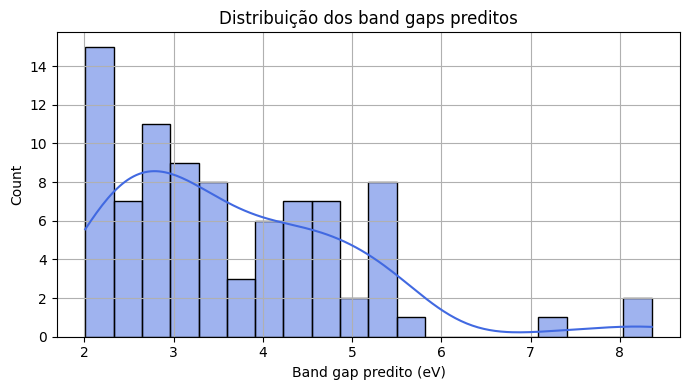

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.histplot(df_ultra['band gap'], bins=20, kde=True, color='royalblue')
plt.title("Distribuição dos band gaps preditos")
plt.xlabel("Band gap predito (eV)")
plt.grid(True)
plt.tight_layout()
plt.show()

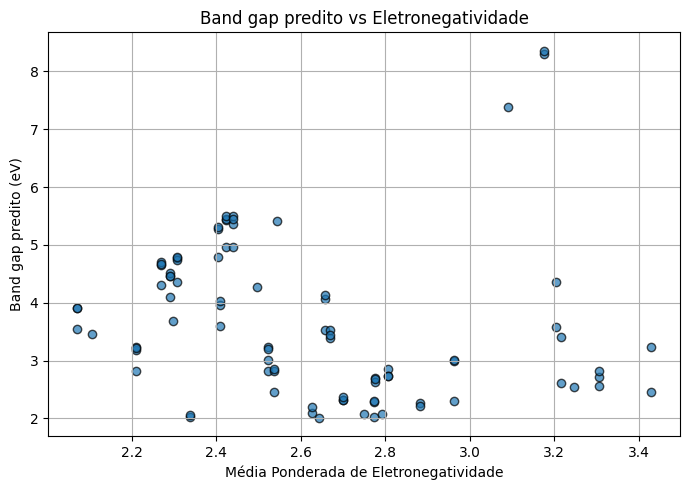

In [190]:
plt.figure(figsize=(7,5))
plt.scatter(df_ultra['media_pon_Electronegativity'], df_ultra['band gap'], alpha=0.7, edgecolor='k')
plt.xlabel("Média Ponderada de Eletronegatividade")
plt.ylabel("Band gap predito (eV)")
plt.title("Band gap predito vs Eletronegatividade")
plt.grid(True)
plt.tight_layout()
plt.show()


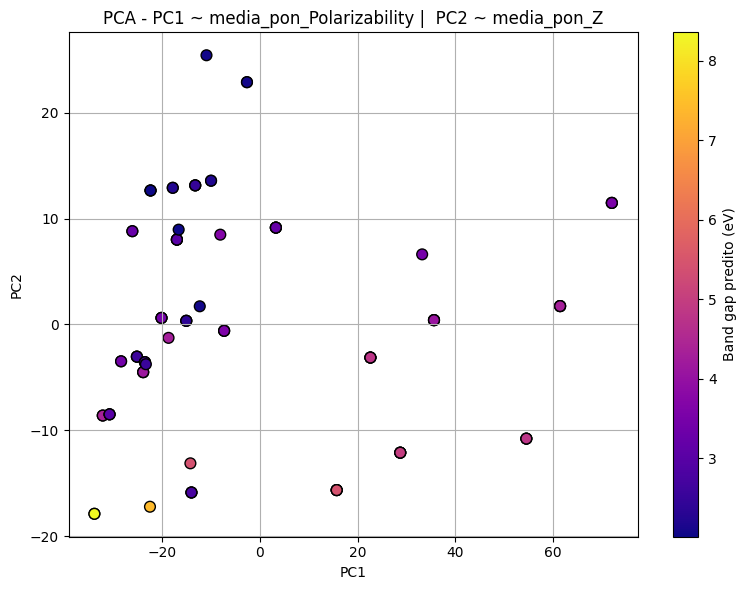

In [196]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Seleção de features
features = [c for c in df_ultra.columns if c.startswith('media_pon_')]
X = df_ultra[features]

# PCA
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X)

# Loadings
loadings = pd.DataFrame(pca.components_.T, index=features, columns=["PC1", "PC2"])
loadings["magnitude"] = np.sqrt(loadings["PC1"]**2 + loadings["PC2"]**2)

# Pega as variáveis que mais contribuem
top_pc1 = loadings["PC1"].abs().sort_values(ascending=False).head(2).index.tolist()
top_pc2 = loadings["PC2"].abs().sort_values(ascending=False).head(2).index.tolist()

# Gráfico com legenda indicando principais contribuições
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_proj[:,0], X_proj[:,1], c=df_ultra['band gap'], cmap='plasma', s=60, edgecolor='k')
plt.colorbar(scatter, label="Band gap predito (eV)")

# Título com destaque dos eixos
plt.title(f"PCA - PC1 ~ {top_pc1[0]} |  PC2 ~ {top_pc2[0]}", fontsize=12)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()
